<a href="https://colab.research.google.com/github/gabrielantonyxaviour/aptos-hack/blob/ML-model-to-predict-influencers-score-and-correlation-factor/ML_model_to_predict_Credibility_Score_and_correlation_factor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MODEL

# Load Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving followers data.csv to followers data.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['followers data.csv']))
df

,Selective Liking,Selective Commenting,Balance in dollars,Credibility Weight,Social Status,Quality of Followers
0,0,1,22841,13707,6,4
1,1,0,41277,24769,8,9
2,0,0,37826,22699,9,9
3,0,0,18967,11384,9,3
4,0,1,42656,25594,1,2
...,...,...,...,...,...,...
4995,1,1,12046,7229,4,9
4996,1,0,28471,17085,5,5
4997,1,1,40983,24593,8,3
4998,0,1,29603,17763,3,3


from matplotlib import pyplot as plt
df['Selective Liking'].plot(kind='hist', bins=20, title='Selective Liking')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Selective Commenting'].plot(kind='hist', bins=20, title='Selective Commenting')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df[' Balance in dollars'].plot(kind='hist', bins=20, title=' Balance in dollars')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Credibility Weight'].plot(kind='hist', bins=20, title='Credibility Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Selective Liking', y='Selective Commenting', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Selective Commenting', y=' Balance in dollars', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x=' Balance in dollars', y='Credibility Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Credibility Weight', y='Social Status', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Selective Liking'].plot(kind='line', figsize=(8, 4), title='Selective Liking')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Selective Commenting'].plot(kind='line', figsize=(8, 4), title='Selective Commenting')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df[' Balance in dollars'].plot(kind='line', figsize=(8, 4), title=' Balance in dollars')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Credibility Weight'].plot(kind='line', figsize=(8, 4), title='Credibility Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

# Data preperation

## Data seperation as X and Y

In [ ]:
y = df['Credibility Weight']
y

,Credibility Weight
0,13707
1,24769
2,22699
3,11384
4,25594
...,...
4995,7229
4996,17085
4997,24593
4998,17763


In [ ]:
x = df.drop('Credibility Weight',axis=1)
x

,Selective Liking,Selective Commenting,Balance in dollars,Social Status,Quality of Followers
0,0,1,22841,6,4
1,1,0,41277,8,9
2,0,0,37826,9,9
3,0,0,18967,9,3
4,0,1,42656,1,2
...,...,...,...,...,...
4995,1,1,12046,4,9
4996,1,0,28471,5,5
4997,1,1,40983,8,3
4998,0,1,29603,3,3


## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
x_train

,Selective Liking,Selective Commenting,Balance in dollars,Social Status,Quality of Followers
4833,1,0,36873,9,8
1218,1,1,27596,7,6
135,1,0,49106,5,5
3612,0,0,49053,1,8
3259,0,0,44483,9,5
...,...,...,...,...,...
4149,0,1,42180,4,8
1890,1,1,2566,1,4
350,1,0,38062,1,3
79,1,0,15252,4,3


In [ ]:
x_test

,Selective Liking,Selective Commenting,Balance in dollars,Social Status,Quality of Followers
789,0,1,29856,2,2
2507,0,0,28174,1,9
2376,0,0,15329,6,4
1378,1,0,37284,2,1
598,0,1,36100,7,6
...,...,...,...,...,...
1451,0,0,43272,2,5
4921,0,0,7887,4,8
3091,0,0,45995,2,3
3683,0,0,30292,6,8


# **Model building**

## **Linear Regression**

### Traning model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([22127.40597236, 16560.3998278 , 29465.60184611, ...,
       22837.59171082,  9152.7853611 ,  9187.59889621])

In [ ]:
y_lr_test_pred

array([17914.3869195 , 16904.79811117,  9199.78583985, 22371.18779049,
       21662.80009185, 13691.99713229,  9156.58740013,  6084.38408574,
       20172.38978951,  7079.79558485,  2382.99679314, 10428.184164  ,
        3825.18378031,  2646.58277334,  2229.38751256, 10101.59912722,
       28808.40297343, 15347.58102336, 26884.40624101,  6985.38453125,
       23908.60645214, 14558.99237521, 14400.78966587,  6628.79061657,
        8799.98674185, 24973.8030686 , 13841.59686343, 18580.39367471,
       28828.60107625, 16056.99943437, 22886.58808934,  8362.19013788,
         673.58842524,   735.97728229,  6443.98766978, 28864.00635659,
        4371.57936577,  3824.394278  , 25688.40091768, 12774.98867083,
       21920.59918445,  5423.38843384, 13007.79743684,  9182.19680391,
       10070.99837616,  9168.58902015,  1730.99036962,  5431.18783299,
        6278.79194975, 26443.20392062, 21308.39837797, 29576.19669963,
       25781.59442242, 15991.5873653 , 28815.79618178, 22440.40142248,
      

###Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("Linear Regression Model Performance:")
print("Training MSE:", lr_train_mse)
print("Training R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)

Linear Regression Model Performance:
Training MSE: 0.07895383102978222
Training R2: 0.9999999988956118
Test MSE: 0.08184318602457241
Test R2: 0.9999999988271491


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Test R2
0,Linear regression,0.078954,1.0,0.081843,1.0


## Random Forest

## Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating Model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,4072251.806106,0.943038,4066774.073589,0.941721


## Model Comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.078954,1.0,0.081843,1.0,NaN
1,Random forest,4072251.806106,0.943038,NaN,0.941721,4066774.073589


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.078954,1.0,0.081843,1.0,NaN
1,Random forest,4072251.806106,0.943038,NaN,0.941721,4066774.073589


# Data visualization of predicted result

Text(0.5, 0, 'Experimental Score')

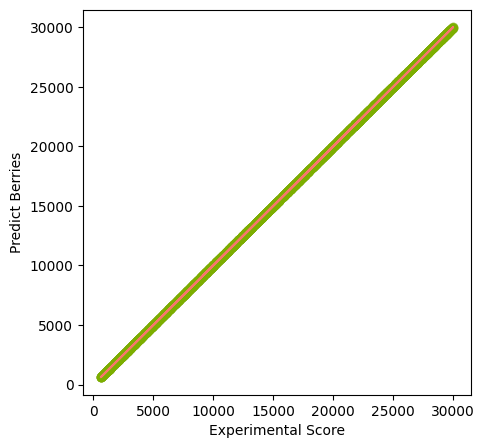

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predict Berries')
plt.xlabel('Experimental Score')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Credibility Weight']
x = df.drop('Credibility Weight', axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# To predict the 'Influencer Score' for new data, use:
# new_data_predictions = model.predict(new_data)

Mean Squared Error: 0.08184318602457241
R-squared: 0.9999999988271491


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Influencer Score' with other parameters
influencer_score_corr = correlation_matrix['Credibility Weight']

# Print the correlations
print(influencer_score_corr)

# You can also sort the correlations in descending order:
sorted_corr = influencer_score_corr.sort_values(ascending=False)
print(sorted_corr)

Selective Liking        0.019760
Selective Commenting   -0.005411
 Balance in dollars     1.000000
Credibility Weight      1.000000
Social Status          -0.016727
Quality of Followers    0.006673
Name: Credibility Weight, dtype: float64
Credibility Weight      1.000000
 Balance in dollars     1.000000
Selective Liking        0.019760
Quality of Followers    0.006673
Selective Commenting   -0.005411
Social Status          -0.016727
Name: Credibility Weight, dtype: float64


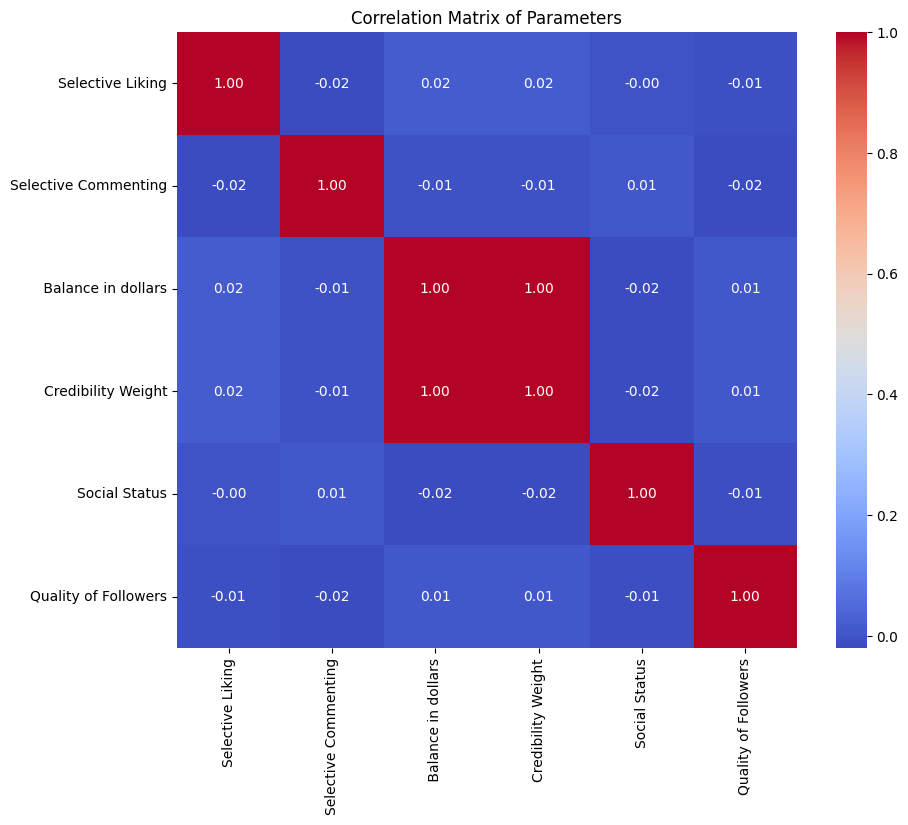

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

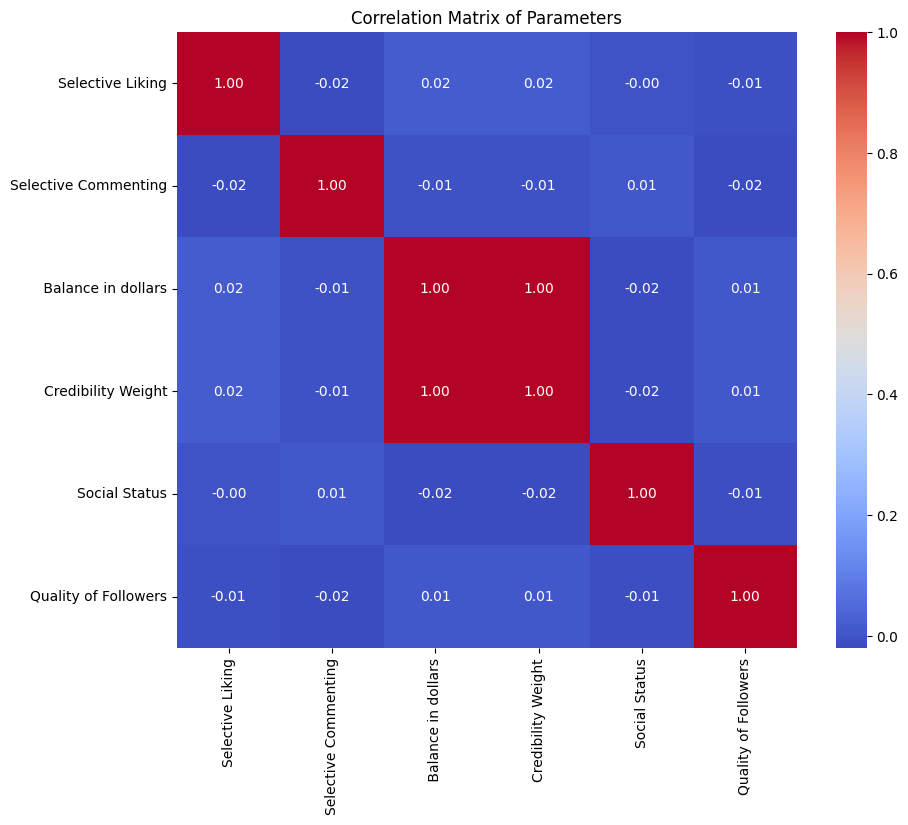

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Credibility Weight']
x = df.drop('Credibility Weight', axis=1)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x, y) #Note: We're now training on the full dataset

def predict_credibility_weight(Selective_Liking, Selective_Commenting, Balance_in_dollars, Social_Status, Quality_of_Followers):
    """
    Predicts Credibility Weight based on input parameters.

    Args:
        Selective_Liking: Value for Selective Liking.
        Selective_Commenting: Value for Selective Commenting.
        Balance_in_dollars: Value for Balance in dollars.
        Social_Status: Value for Social Status.
        Quality_of_Followers: Value for Quality of Followers.

    Returns:
        Predicted Credibility Weight.
    """

    # Create a DataFrame with the input values, using the exact column names from training data
    input_data = pd.DataFrame({
        'Selective Liking': [Selective_Liking],
        'Selective Commenting': [Selective_Commenting],
        ' Balance in dollars': [Balance_in_dollars],  # Use the exact name from the training data (with the space)
        'Social Status': [Social_Status],
        'Quality of Followers': [Quality_of_Followers]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    return prediction

# Example usage:
credibility_weight = predict_credibility_weight(Selective_Liking=1, Selective_Commenting=1, Balance_in_dollars=1, Social_Status=1, Quality_of_Followers=1)
print("Predicted Credibility Weight:", credibility_weight)

Predicted Credibility Weight: 0.9906594343272446


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Credibility Weight']
x = df.drop('Credibility Weight', axis=1)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x, y) #Note: We're now training on the full dataset

def predict_credibility_weight(Selective_Liking, Selective_Commenting, Balance_in_dollars, Social_Status, Quality_of_Followers):
    """
    Predicts Credibility Weight based on input parameters.

    Args:
        Selective_Liking: Value for Selective Liking.
        Selective_Commenting: Value for Selective Commenting.
        Balance_in_dollars: Value for Balance in dollars.
        Social_Status: Value for Social Status.
        Quality_of_Followers: Value for Quality of Followers.

    Returns:
        Predicted Credibility Weight.
    """

    # Create a DataFrame with the input values, using the exact column names from training data
    input_data = pd.DataFrame({
        'Selective Liking': [Selective_Liking],
        'Selective Commenting': [Selective_Commenting],
        ' Balance in dollars': [Balance_in_dollars],  # Use the exact name from the training data (with the space)
        'Social Status': [Social_Status],
        'Quality of Followers': [Quality_of_Followers]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    return prediction

# Example usage:
credibility_weight = predict_credibility_weight(Selective_Liking=1, Selective_Commenting=1, Balance_in_dollars=1, Social_Status=1, Quality_of_Followers=1)
print("Predicted Credibility Weight:", credibility_weight)

Predicted Credibility Weight: 0.9906594343272446


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Credibility Weight']
x = df.drop('Credibility Weight', axis=1)

# Create and train a Random Forest model
model = RandomForestRegressor(max_depth=2, random_state=100)
model.fit(x, y) # Note: We're now training on the full dataset

def predict_credibility_weight(Selective_Liking, Selective_Commenting, Balance_in_dollars, Social_Status, Quality_of_Followers):
    """
    Predicts Credibility Weight based on input parameters.

    Args:
        Selective_Liking: Value for Selective Liking.
        Selective_Commenting: Value for Selective Commenting.
        Balance_in_dollars: Value for Balance in dollars.
        Social_Status: Value for Social Status.
        Quality_of_Followers: Value for Quality of Followers.

    Returns:
        Predicted Credibility Weight.
    """

    # Create a DataFrame with the input values, ensuring column names match training data
    input_data = pd.DataFrame({
        'Selective Liking': [Selective_Liking],
        'Selective Commenting': [Selective_Commenting],
        ' Balance in dollars': [Balance_in_dollars],  # Match the exact name from training data (with the space)
        'Social Status': [Social_Status],
        'Quality of Followers': [Quality_of_Followers]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    return prediction

# Example usage:
credibility_weight = predict_credibility_weight(Selective_Liking=1, Selective_Commenting=1, Balance_in_dollars=1, Social_Status=1, Quality_of_Followers=1)
print("Predicted Credibility Weight:", credibility_weight)

Predicted Credibility Weight: 4275.548686499174


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Credibility Weight']
x = df.drop('Credibility Weight', axis=1)

# Create and train a Random Forest model
model = RandomForestRegressor(max_depth=2, random_state=100)
model.fit(x, y) # Note: We're now training on the full dataset

def predict_credibility_weight(Selective_Liking, Selective_Commenting, Balance_in_dollars, Social_Status, Quality_of_Followers):
    """
    Predicts Credibility Weight based on input parameters.

    Args:
        Selective_Liking: Value for Selective Liking.
        Selective_Commenting: Value for Selective Commenting.
        Balance_in_dollars: Value for Balance in dollars.
        Social_Status: Value for Social Status.
        Quality_of_Followers: Value for Quality of Followers.

    Returns:
        Predicted Credibility Weight.
    """

    # Create a DataFrame with the input values, ensuring column names match training data
    input_data = pd.DataFrame({
        'Selective Liking': [Selective_Liking],
        'Selective Commenting': [Selective_Commenting],
        ' Balance in dollars': [Balance_in_dollars],  # Match the exact name from training data (with the space)
        'Social Status': [Social_Status],
        'Quality of Followers': [Quality_of_Followers]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    return prediction

# Example usage:
credibility_weight = predict_credibility_weight(Selective_Liking=1, Selective_Commenting=1, Balance_in_dollars=1, Social_Status=1, Quality_of_Followers=1)
print("Predicted Credibility Weight:", credibility_weight)

Predicted Credibility Weight: 4275.548686499174


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ... (rest of the code remains the same) ...

# Example usage:
credibility_weight = predict_credibility_weight(Selective_Liking=1, Selective_Commenting=1, Balance_in_dollars=1, Social_Status=1, Quality_of_Followers=1)

# Round off the credibility weight to 2 decimal places
rounded_credibility_weight = round(credibility_weight, 2)

print("Predicted Credibility Weight:", credibility_weight)
print("Rounded Credibility Weight:", rounded_credibility_weight)

Predicted Credibility Weight: 4275.548686499174
Rounded Credibility Weight: 4275.55


In [ ]:
import pickle

# Assuming 'model' is your trained machine learning model (e.g., lr or rf)
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle

# Load the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [ ]:
from google.colab import files

files.download('trained_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>